In [1]:
import pandas as pd
import numpy as np

# Preprocessing 
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
from sklearn.preprocessing import LabelEncoder

# Visualization 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
faq = pd.read_csv('dataset_mentalhealth.csv')
faq.head()

,Question_ID,Questions,Answers
0,1590140,Apa yang dimaksud dengan penyakit mental?,Penyakit mental adalah kondisi kesehatan yang ...
1,2110618,Siapa yang terpengaruh oleh penyakit mental?,Diperkirakan bahwa penyakit mental mempengaruh...
2,6361820,Apa penyebab penyakit mental?,Diperkirakan bahwa penyakit mental mempengaruh...
3,9434130,Apa sajakah tanda-tanda peringatan penyakit me...,Gejala gangguan kesehatan mental bervariasi te...
4,7657263,Apakah penderita penyakit jiwa bisa sembuh?,"Ketika penyembuhan dari penyakit mental, ident..."


In [3]:
faq_q = faq[['Question_ID', 'Questions']]
faq_a = faq[['Question_ID', 'Answers']]

## Preprocessing 

In [4]:
def to_lower(text):
    return text.lower()

In [5]:
def remove_number(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output

def remove_punct(text):
    return "".join(c for c in text if c not in punctuation)

def to_strip(text):
    return " ".join([c for c in text.split() if len(c)>2])

def remove_char(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    return text

def remove_duplicate(text):
    text = re.sub("(.)\\1{2,}", "\\1", text)
    return text

In [6]:
nltk.download('stopwords')

def remove_stopwords(text):
    stop_words= stopwords.words('indonesian')
    
    return ' '.join(c for c in nltk.word_tokenize(text) if c not in stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
nltk.download('wordnet')
nltk.download('punkt')

wordnet_lemma = WordNetLemmatizer()

def lemma(text):
    lemmatize_words = [wordnet_lemma.lemmatize(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    return ' '.join(lemmatize_words)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
faq_q['prep1']= faq_q['Questions'].apply(to_lower)
faq_q['prep2']= faq_q['prep1'].apply(remove_number)
faq_q['prep3']= faq_q['prep2'].apply(remove_punct)
faq_q['prep4']= faq_q['prep3'].apply(to_strip)
faq_q['prep5']= faq_q['prep4'].apply(remove_char)
faq_q['prep6']= faq_q['prep5'].apply(remove_duplicate)
faq_q['prep7']= faq_q['prep6'].apply(remove_stopwords)
faq_q['lemma']= faq_q['prep7'].apply(lemma)
faq_q.head()

,Question_ID,Questions,prep1,prep2,prep3,prep4,prep5,prep6,prep7,lemma
0,1590140,Apa yang dimaksud dengan penyakit mental?,apa yang dimaksud dengan penyakit mental?,apa yang dimaksud dengan penyakit mental?,apa yang dimaksud dengan penyakit mental,apa yang dimaksud dengan penyakit mental,apa yang dimaksud dengan penyakit mental,apa yang dimaksud dengan penyakit mental,penyakit mental,penyakit mental
1,2110618,Siapa yang terpengaruh oleh penyakit mental?,siapa yang terpengaruh oleh penyakit mental?,siapa yang terpengaruh oleh penyakit mental?,siapa yang terpengaruh oleh penyakit mental,siapa yang terpengaruh oleh penyakit mental,siapa yang terpengaruh oleh penyakit mental,siapa yang terpengaruh oleh penyakit mental,terpengaruh penyakit mental,terpengaruh penyakit mental
2,6361820,Apa penyebab penyakit mental?,apa penyebab penyakit mental?,apa penyebab penyakit mental?,apa penyebab penyakit mental,apa penyebab penyakit mental,apa penyebab penyakit mental,apa penyebab penyakit mental,penyebab penyakit mental,penyebab penyakit mental
3,9434130,Apa sajakah tanda-tanda peringatan penyakit me...,apa sajakah tanda-tanda peringatan penyakit me...,apa sajakah tanda-tanda peringatan penyakit me...,apa sajakah tandatanda peringatan penyakit mental,apa sajakah tandatanda peringatan penyakit mental,apa sajakah tandatanda peringatan penyakit mental,apa sajakah tandatanda peringatan penyakit mental,sajakah tandatanda peringatan penyakit mental,sajakah tandatanda peringatan penyakit mental
4,7657263,Apakah penderita penyakit jiwa bisa sembuh?,apakah penderita penyakit jiwa bisa sembuh?,apakah penderita penyakit jiwa bisa sembuh?,apakah penderita penyakit jiwa bisa sembuh,apakah penderita penyakit jiwa bisa sembuh,apakah penderita penyakit jiwa bisa sembuh,apakah penderita penyakit jiwa bisa sembuh,penderita penyakit jiwa sembuh,penderita penyakit jiwa sembuh


In [9]:
faq_a['prep1']= faq_a['Answers'].apply(to_lower)
faq_a['prep2']= faq_a['prep1'].apply(remove_number)
faq_a['prep3']= faq_a['prep2'].apply(remove_punct)
faq_a['prep4']= faq_a['prep3'].apply(to_strip)
faq_a['prep5']= faq_a['prep4'].apply(remove_char)
faq_a['prep6']= faq_a['prep5'].apply(remove_duplicate)
faq_a['prep7']= faq_a['prep6'].apply(remove_stopwords)
faq_a['lemma']= faq_a['prep7'].apply(lemma)
faq_a.head()

,Question_ID,Answers,prep1,prep2,prep3,prep4,prep5,prep6,prep7,lemma
0,1590140,Penyakit mental adalah kondisi kesehatan yang ...,penyakit mental adalah kondisi kesehatan yang ...,penyakit mental adalah kondisi kesehatan yang ...,penyakit mental adalah kondisi kesehatan yang ...,penyakit mental adalah kondisi kesehatan yang ...,penyakit mental adalah kondisi kesehatan yang ...,penyakit mental adalah kondisi kesehatan yang ...,penyakit mental kondisi kesehatan mengganggu p...,penyakit mental kondisi kesehatan mengganggu p...
1,2110618,Diperkirakan bahwa penyakit mental mempengaruh...,diperkirakan bahwa penyakit mental mempengaruh...,diperkirakan bahwa penyakit mental mempengaruh...,diperkirakan bahwa penyakit mental mempengaruh...,diperkirakan bahwa penyakit mental mempengaruh...,diperkirakan bahwa penyakit mental mempengaruh...,diperkirakan bahwa penyakit mental mempengaruh...,penyakit mental mempengaruhi orang dewasa amer...,penyakit mental mempengaruhi orang dewasa amer...
2,6361820,Diperkirakan bahwa penyakit mental mempengaruh...,diperkirakan bahwa penyakit mental mempengaruh...,diperkirakan bahwa penyakit mental mempengaruh...,diperkirakan bahwa penyakit mental mempengaruh...,diperkirakan bahwa penyakit mental mempengaruh...,diperkirakan bahwa penyakit mental mempengaruh...,diperkirakan bahwa penyakit mental mempengaruh...,penyakit mental mempengaruhi orang dewasa amer...,penyakit mental mempengaruhi orang dewasa amer...
3,9434130,Gejala gangguan kesehatan mental bervariasi te...,gejala gangguan kesehatan mental bervariasi te...,gejala gangguan kesehatan mental bervariasi te...,gejala gangguan kesehatan mental bervariasi te...,gejala gangguan kesehatan mental bervariasi te...,gejala gangguan kesehatan mental bervariasi te...,gejala gangguan kesehatan mental bervariasi te...,gejala gangguan kesehatan mental bervariasi te...,gejala gangguan kesehatan mental bervariasi te...
4,7657263,"Ketika penyembuhan dari penyakit mental, ident...","ketika penyembuhan dari penyakit mental, ident...","ketika penyembuhan dari penyakit mental, ident...",ketika penyembuhan dari penyakit mental identi...,ketika penyembuhan dari penyakit mental identi...,ketika penyembuhan dari penyakit mental identi...,ketika penyembuhan dari penyakit mental identi...,penyembuhan penyakit mental identifikasi pengo...,penyembuhan penyakit mental identifikasi pengo...


## Wordcloud

In [10]:
def plot_cloud(wordcloud):
    plt.figure(figsize= (20,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')

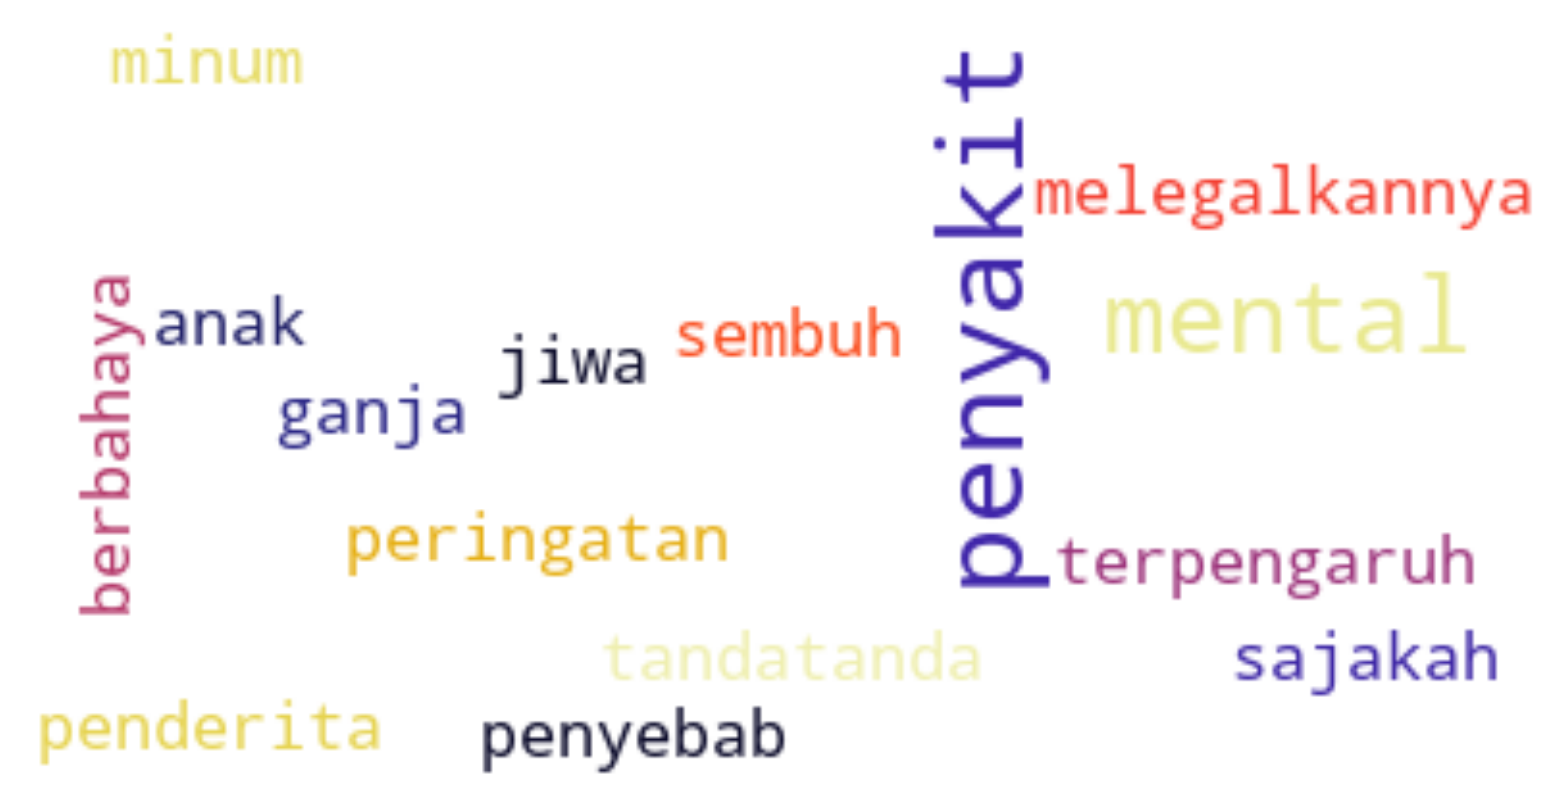

In [11]:
word_cloud= WordCloud(max_font_size=30, max_words=15, 
                      background_color="white", colormap ='CMRmap', 
                      collocations = False, 
                      stopwords = stopwords.words('indonesian')).generate(str(faq_q['lemma']))
plot_cloud(word_cloud)

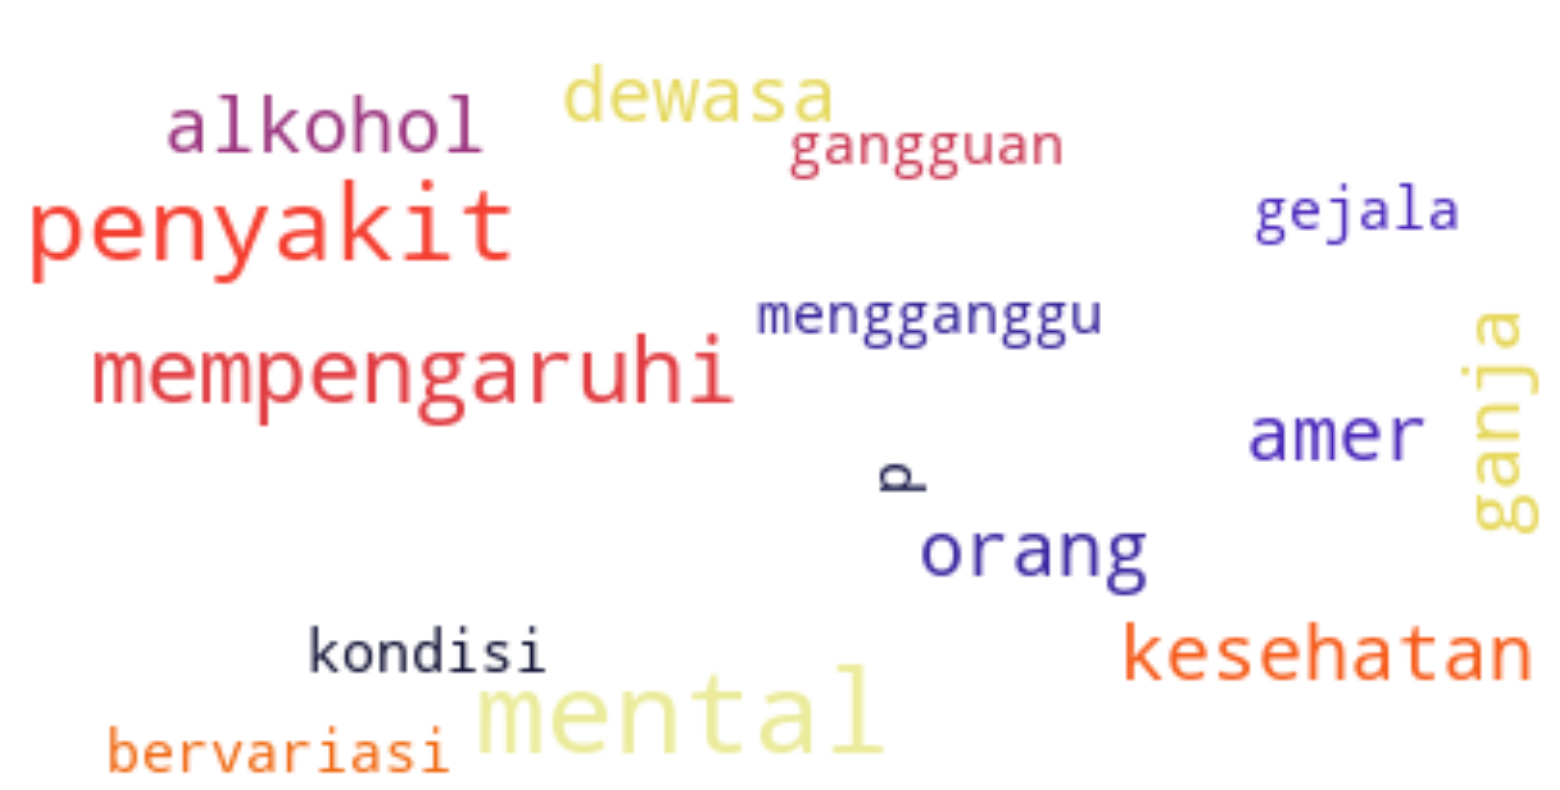

In [12]:
word_cloud= WordCloud(max_font_size=30, max_words=15, 
                      background_color="white", colormap ='CMRmap', 
                      collocations = False, 
                      stopwords = stopwords.words('indonesian')).generate(str(faq_a['lemma']))
plot_cloud(word_cloud)

## Labeling

In [13]:
label = LabelEncoder()
faq['AnswersEncode'] = label.fit_transform(faq['Answers'])
faq

,Question_ID,Questions,Answers,AnswersEncode
0,1590140,Apa yang dimaksud dengan penyakit mental?,Penyakit mental adalah kondisi kesehatan yang ...,72
1,2110618,Siapa yang terpengaruh oleh penyakit mental?,Diperkirakan bahwa penyakit mental mempengaruh...,23
2,6361820,Apa penyebab penyakit mental?,Diperkirakan bahwa penyakit mental mempengaruh...,24
3,9434130,Apa sajakah tanda-tanda peringatan penyakit me...,Gejala gangguan kesehatan mental bervariasi te...,33
4,7657263,Apakah penderita penyakit jiwa bisa sembuh?,"Ketika penyembuhan dari penyakit mental, ident...",50
...,...,...,...,...
93,4373204,Bagaimana saya tahu kalau saya minum terlalu b...,Menyortir jika Anda minum terlalu banyak bisa ...,61
94,7807643,"Jika ganja berbahaya, mengapa kita melegalkannya?","Asap ganja, misalnya, mengandung racun penyeba...",9
95,4352464,Bagaimana cara meyakinkan anak saya untuk tida...,Anda tidak bisa. Tetapi Anda dapat mempengaruh...,7
96,6521784,Apa status hukum (dan bukti) minyak CBD?,Cannabidiol atau CBD adalah komponen ganja yan...,20


In [14]:
text = faq['Questions']
y= faq['AnswersEncode'].values

In [15]:
tfidf = TfidfVectorizer(
    use_idf=True, analyzer='word', 
    stop_words=stopwords.words('indonesian'), 
    token_pattern=r'\b[^\d\W]+\b', 
    ngram_range=(1,2)
)

X_train = tfidf.fit_transform(text)
print(X_train)

  (0, 291)	0.6407692119624953
  (0, 248)	0.45642965613569336
  (0, 289)	0.6173222707798703
  (1, 390)	0.5463789395459112
  (1, 389)	0.5463789395459112
  (1, 291)	0.40674468444748746
  (1, 248)	0.2897304255440008
  (1, 289)	0.39186113743158657
  (2, 294)	0.559790734786479
  (2, 292)	0.5134878224493843
  (2, 291)	0.41672892071313267
  (2, 248)	0.29684234890178646
  (2, 289)	0.40148003186103925
  (3, 312)	0.2968293876754794
  (3, 381)	0.2968293876754794
  (3, 382)	0.2968293876754794
  (3, 355)	0.2968293876754794
  (3, 311)	0.2968293876754794
  (3, 380)	0.5936587753509588
  (3, 354)	0.2968293876754794
  (3, 291)	0.22097077117420402
  (3, 248)	0.1574008413952701
  (3, 289)	0.21288503831114616
  (4, 122)	0.40170051975961263
  (4, 290)	0.40170051975961263
  :	:
  (92, 6)	0.4159308098013814
  (92, 261)	0.338183834897299
  (92, 283)	0.3571174937028935
  (92, 16)	0.2571089950534376
  (93, 252)	1.0
  (94, 24)	0.46211072630182415
  (94, 91)	0.46211072630182415
  (94, 180)	0.46211072630182415
  (94

## Modeling

In [16]:
lsvc = LinearSVC(random_state = 2021)
lsvc.fit(X_train, y)

LinearSVC(random_state=2021)

## Testing

In [17]:
search_test = [
    "Apa itu penyakit mental?",
    "Apa itu kesehatan mental?",
    "Apa perbedaan kesehatan mental dan penyakit mental?",
    "Apa penyebab penyakit mental?",
    "Apa penderita penyakit mental bisa sembuh?",
    "Apa tanda-tanda penyakit mental?",
    "Apa narkoba menyebabkan penyakit mental?",
    "Pilihan pengobatan apa yang tersedia?",
    "Dimana saya bisa mendapat bantuan?",
    "Bagaimana saya bisa menemukan psikolog atau psikiater?"
]

answers_list = []

search_engine = tfidf.transform(search_test)
result = lsvc.predict(search_engine)


for question in search_test:
    result = lsvc.predict(tfidf.transform([question]))
    faq_data = faq.loc[faq.isin([result[0]]).any(axis=1)]
    answers_list.append((question, faq_data['Answers'].values[0]))
    print("Answer: ", faq_data['Answers'].values)

Answer:  ['Penyakit mental adalah kondisi kesehatan yang mengganggu pikiran, emosi, hubungan, dan fungsi seseorang. Mereka dikaitkan dengan kesusahan dan berkurangnya kapasitas untuk terlibat dalam kegiatan kehidupan sehari -hari yang biasa.\nPenyakit mental jatuh di sepanjang rangkaian keparahan: beberapa cukup ringan dan hanya mengganggu beberapa aspek kehidupan, seperti fobia tertentu. Di ujung lain spektrum terletak penyakit mental yang serius, yang mengakibatkan gangguan fungsional utama dan gangguan dengan kehidupan sehari -hari. Ini termasuk gangguan seperti depresi berat, skizofrenia, dan gangguan bipolar, dan mungkin mengharuskan orang tersebut menerima perawatan di rumah sakit.\nPenting untuk mengetahui bahwa penyakit mental adalah kondisi medis yang tidak ada hubungannya dengan karakter, kecerdasan, atau kemauan seseorang. Sama seperti diabetes adalah kelainan pankreas, penyakit mental adalah kondisi medis karena biologi otak.\nDemikian pula dengan bagaimana seseorang akan m

## Saving Answer

In [18]:
answer = pd.DataFrame(answers_list, columns=['Question', 'Answer'])

answer.to_csv('answer_test.csv', index=False)